In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
path = '/Users/gwynethvolkmann/Desktop/datascience/Unit 11'
os.chdir(path) 

In [3]:
df = pd.read_csv('heart_failure_data.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

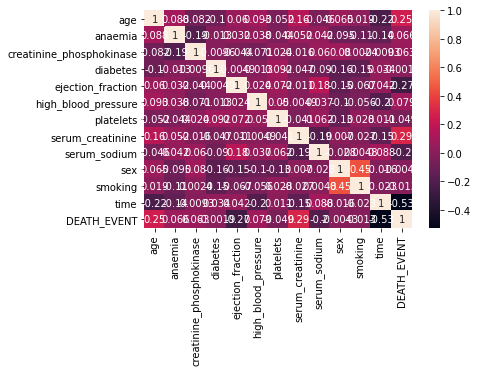

In [8]:
sns.heatmap(df.corr(), annot=True)

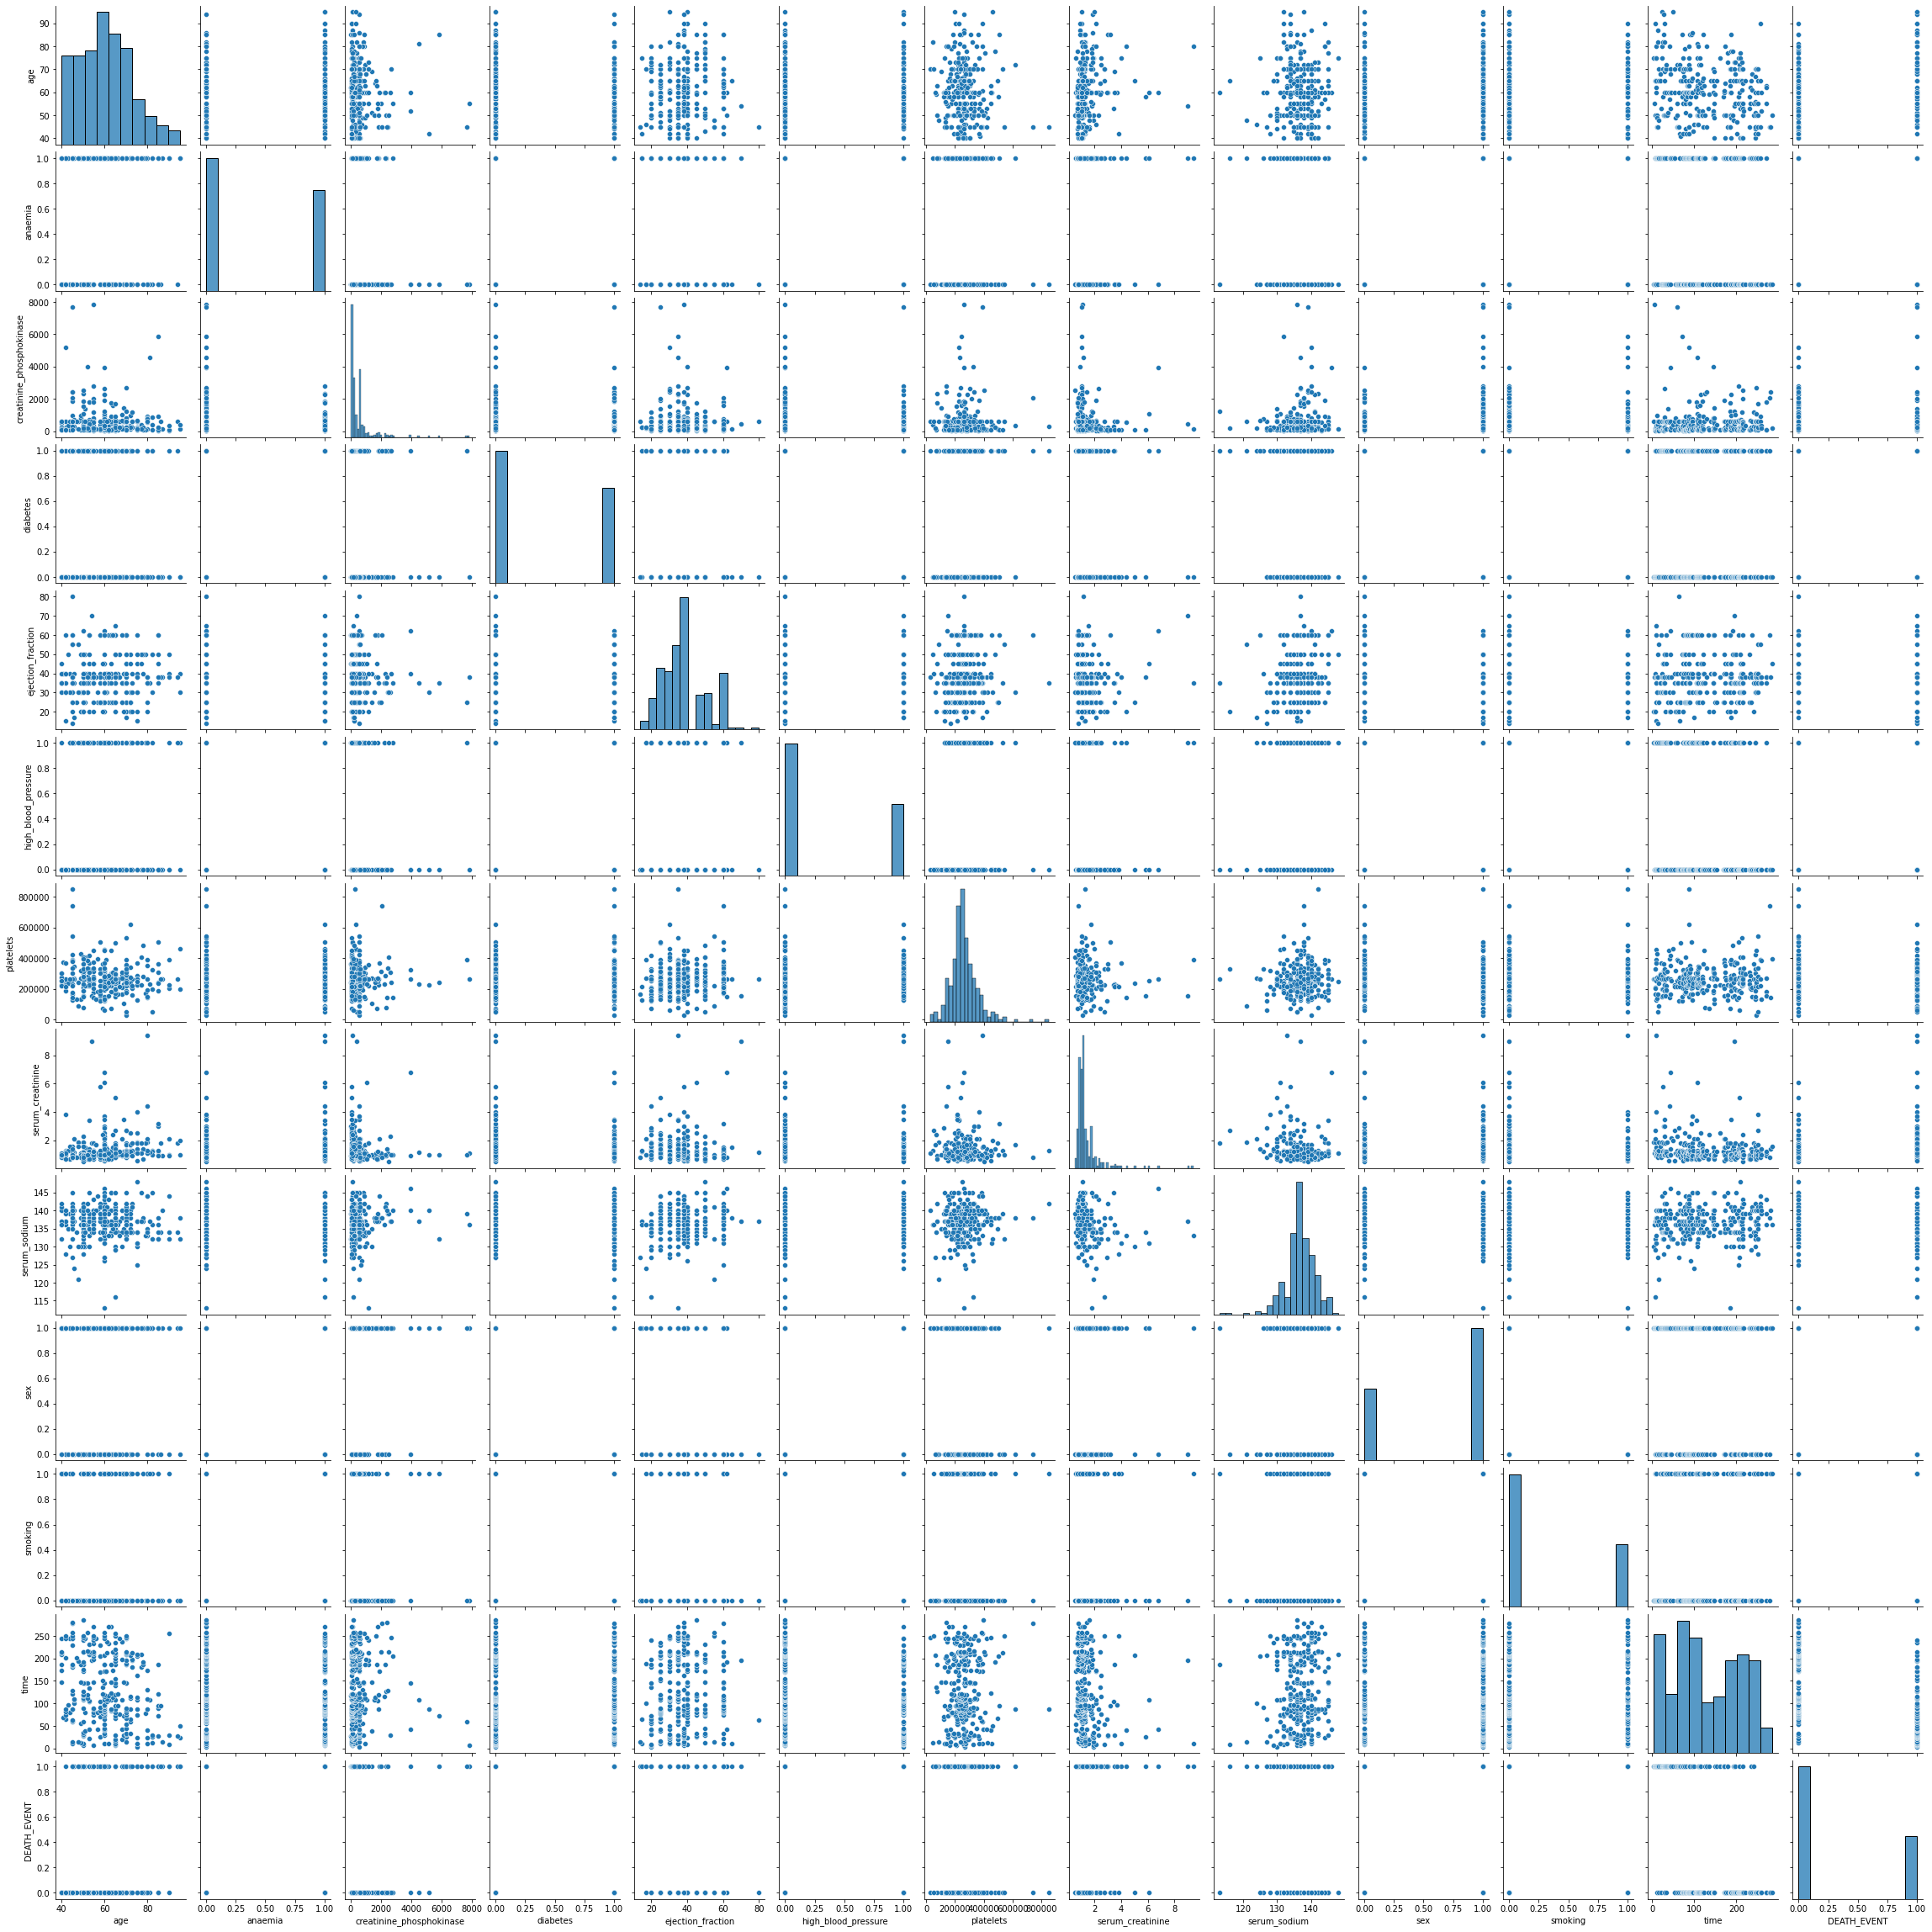

In [9]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

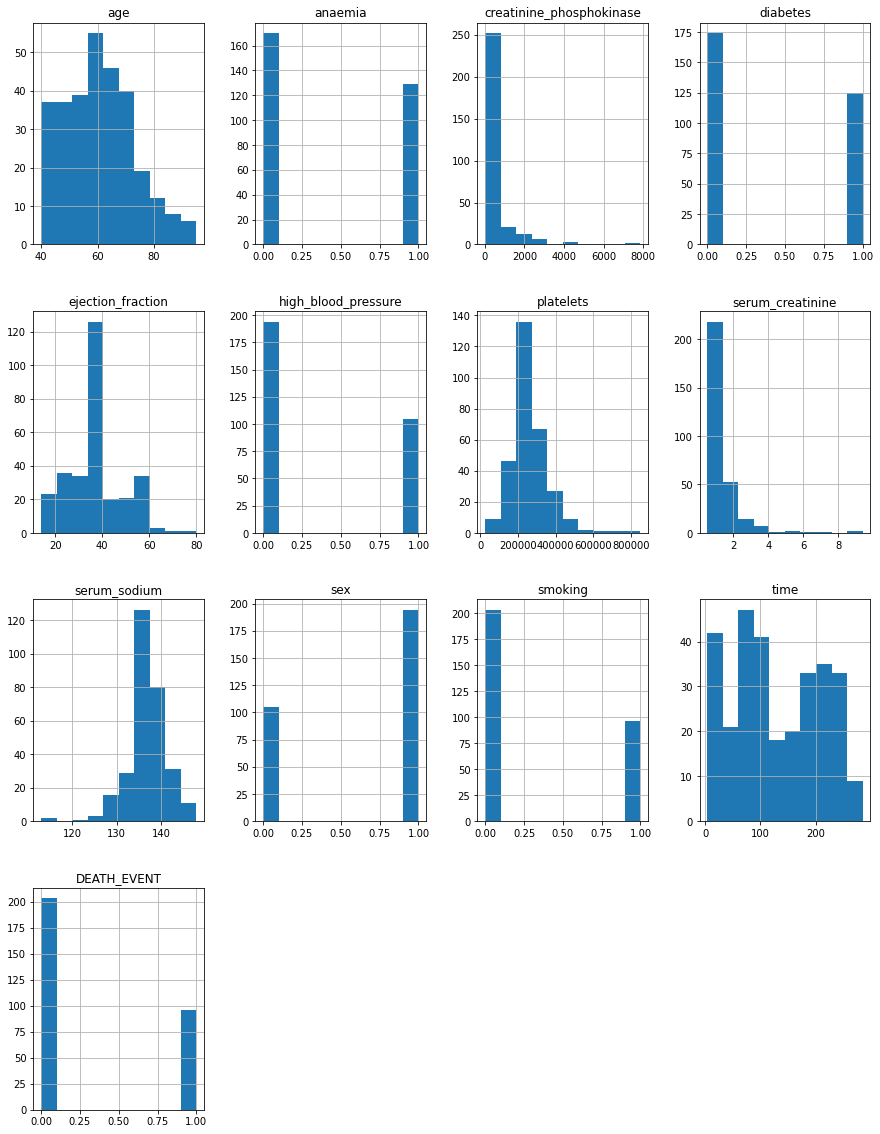

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Correlation between various features


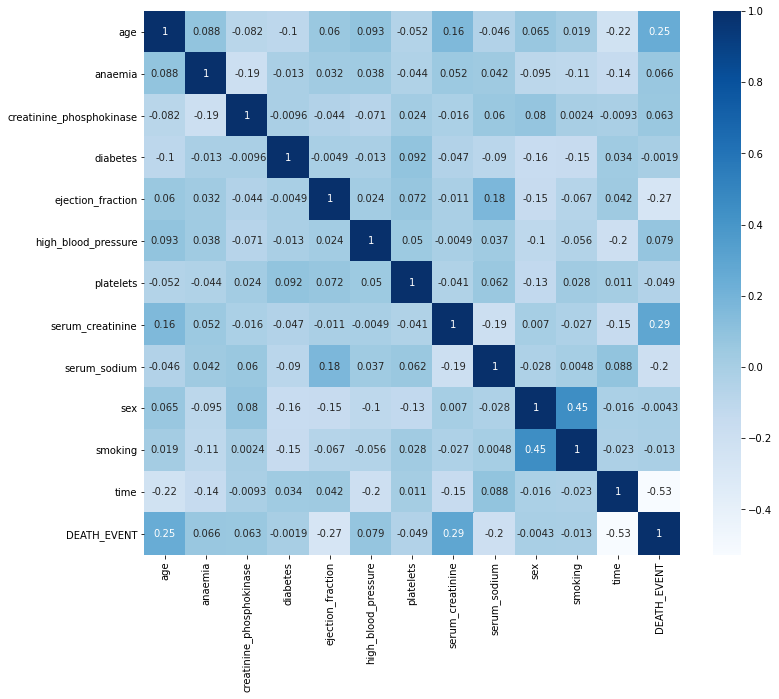

In [11]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

The death event variable seems to be correlated with the age variable and the serum_creatinine variables most closely.

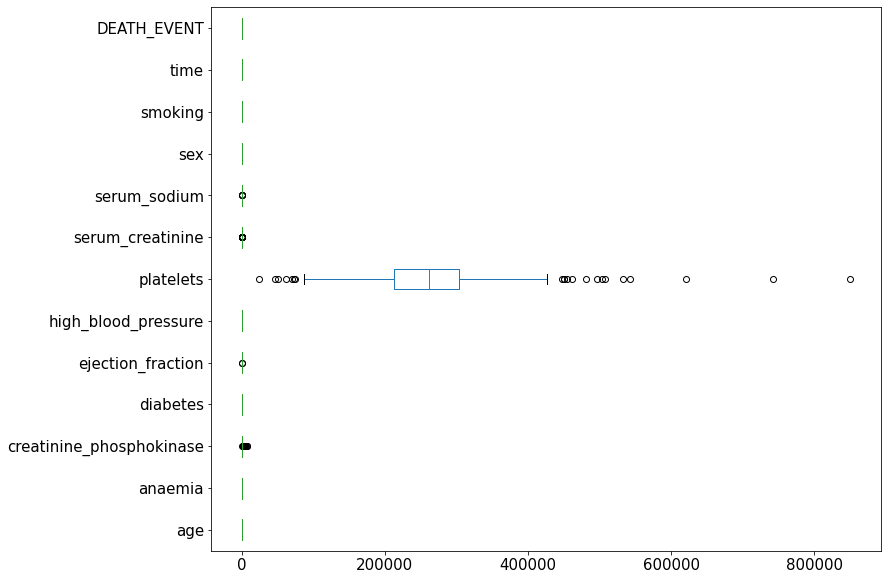

In [12]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

This box plot make it clear that the platelets variable will bee to be normalized so the data can be analyzed on 
the same scale.

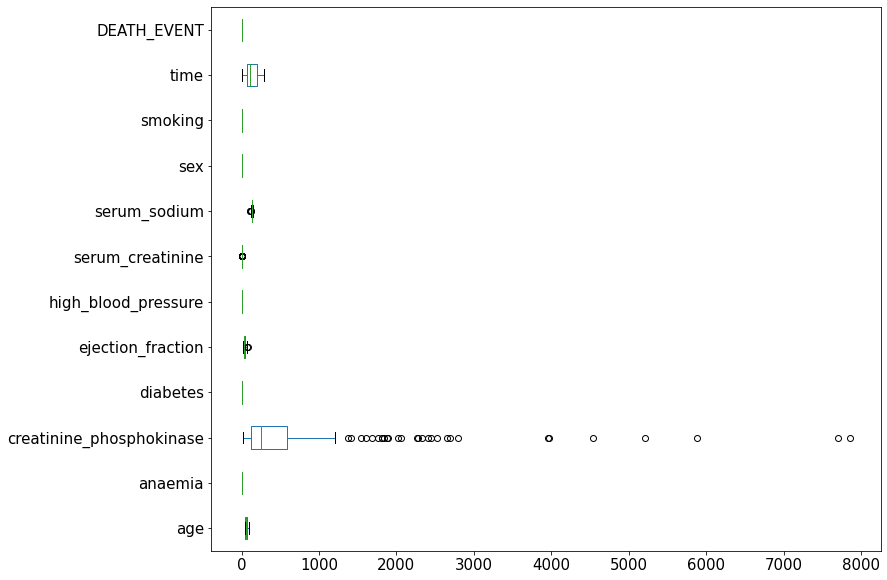

In [13]:
df2 = df.drop(['platelets'], axis=1)
boxplot = df2.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

The creatinine_phosphokinase variable will also need to be normalized in order to analyze data at the same scale.

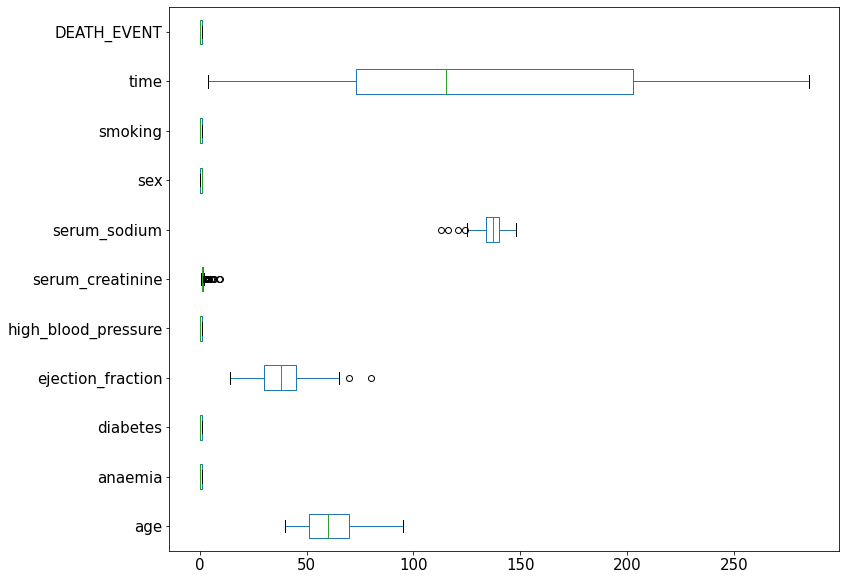

In [14]:
df3 = df2.drop(['creatinine_phosphokinase'], axis=1)
boxplot = df3.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

Text(0, 0.5, 'Number of patients')

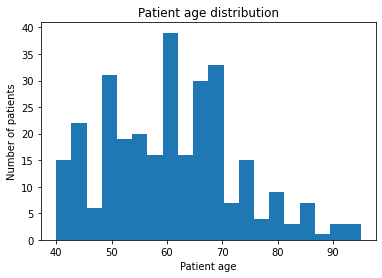

In [15]:
plt.hist(df['age'], bins=20)
plt.title('Patient age distribution')
plt.xlabel('Patient age')
plt.ylabel('Number of patients')

The number of patients is concentrated around the ages of about 40 - 68. The distribution is right skewed. 

<AxesSubplot:xlabel='age', ylabel='Count'>

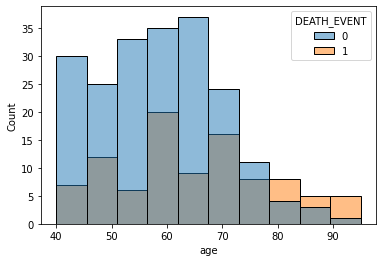

In [16]:
sns.histplot(data=df, x="age", hue="DEATH_EVENT")

From this histogram there is a higher probability of a death event as age increases. 

<AxesSubplot:xlabel='age', ylabel='Count'>

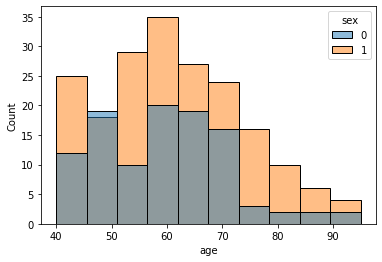

In [17]:
sns.histplot(data=df, x="age", hue="sex")

From this graph it is apparent that there were more male patients in this study than women. This makes sense 
as men experience adverse heart events more frequently than women, although since heart attack symptoms differ 
in women and have been studied less rigorously, these rates might be flexible.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

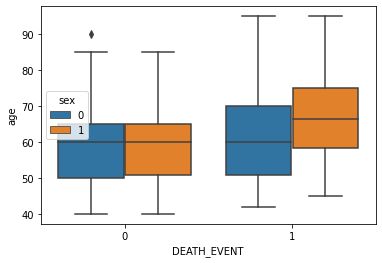

In [18]:
sns.boxplot(x= 'DEATH_EVENT', y='age', hue='sex', data = df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

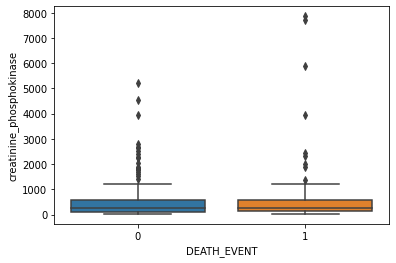

In [19]:
sns.boxplot(x= 'DEATH_EVENT', y='creatinine_phosphokinase', data = df)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

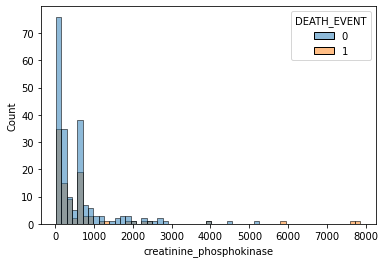

In [20]:
sns.histplot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT")

Low levels of creatinine phosphokinase are associated more closely with patients that did not die.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

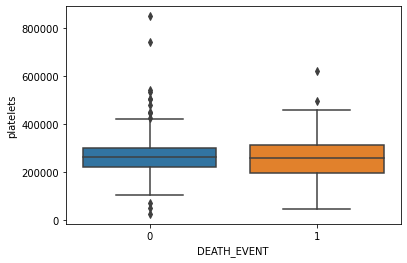

In [21]:
sns.boxplot(x= 'DEATH_EVENT', y='platelets', data = df)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

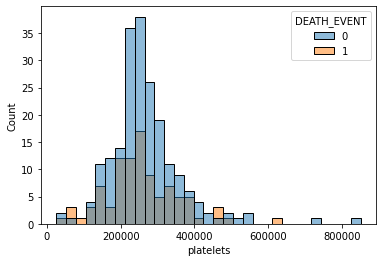

In [22]:
sns.histplot(data=df, x="platelets", hue="DEATH_EVENT")

Platelet levels do seem to differ greatly in patients that died versus patients that did not die, 
just from looking at this histogram.

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

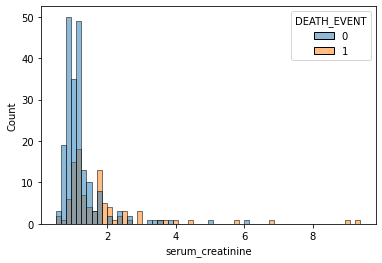

In [23]:
sns.histplot(data=df, x="serum_creatinine", hue="DEATH_EVENT")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

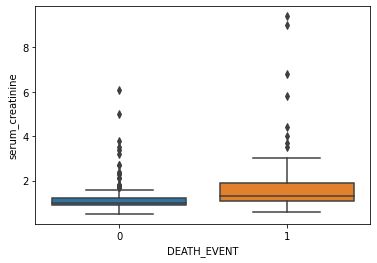

In [24]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_creatinine', data = df)

You can see that serum creatinine levels are slightly higher in patients that died and there are several outliers with
very high serum creatinine levels particularly in the group that had a death event. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

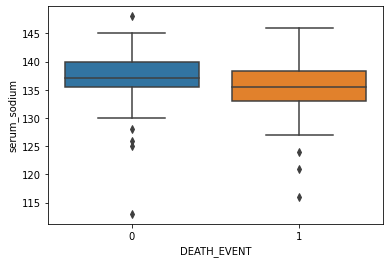

In [25]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_sodium', data = df)

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

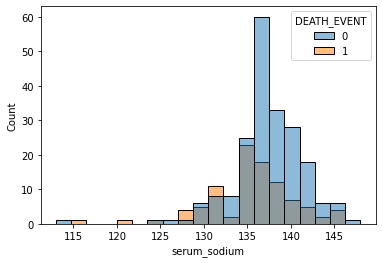

In [26]:
sns.histplot(data=df, x="serum_sodium", hue="DEATH_EVENT")

There is not a huge amount of difference in the amounts of serum sodium between patients who died and did not 
die, however it seems like serum sodium concentrations are slightly lower in patients that died.

Based on the eploratory data analysis, I am most interested in seeing how the age, serum creatinine levels, 
and ejection fraction affect the death event outcome. It appears that older patients are more likely to die, 
and older men are more likely to die than older women. Increased age seems to be associated with higher rates of 
death, lower levels of serum creatinine seem to be associated with lower rates of death, and a higher ejection 
fraction seems to be associated with lower rates of death. According to the box plot and histograms I created, 
higher levels of serum sodium may also be associated with lower rates of death I will be building several models 
to see which variables best explain the death event outcome.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
scaler.transform(df)

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [29]:
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis=1)

In [30]:
regression_model = LogisticRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)

In [31]:
print(cross_val_score(regression_model, X, y, cv=5))

[0.56666667 0.9        0.9        0.86666667 0.6779661 ]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [32]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       203
           1       0.76      0.66      0.70        96

    accuracy                           0.82       299
   macro avg       0.80      0.78      0.79       299
weighted avg       0.82      0.82      0.82       299



For the logistic regression model, the cross validation scores are fairly high for almost all of the folds, 
indicating that the model has correctly assigned most of the data. The classification report also indicates that 
the model is performing well. The precision is high and the f1 score indicates that the balance between precision 
and recall is good. The data is not very balanced. 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X, y)

y_pred = model_res.predict(X)
y_pred_prob = model_res.predict_proba(X)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y, y_pred)

f1 = f1_score(y, y_pred, average='weighted')
cm = confusion_matrix(y, y_pred2)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [54]:
print(cross_val_score(clf, X, y, cv=5))

[0.43333333 0.86666667 0.85       0.7        0.71186441]


In [57]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        96

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



The cross validation test shows that the folds of the data are mostly very accurate, with the exception of the first
fold. The classification report shows that the model is overfitting the data as all data points have been correctly
predicted. This means that the model is correct for this data but would not be very accurate if applied to new
data. 

12


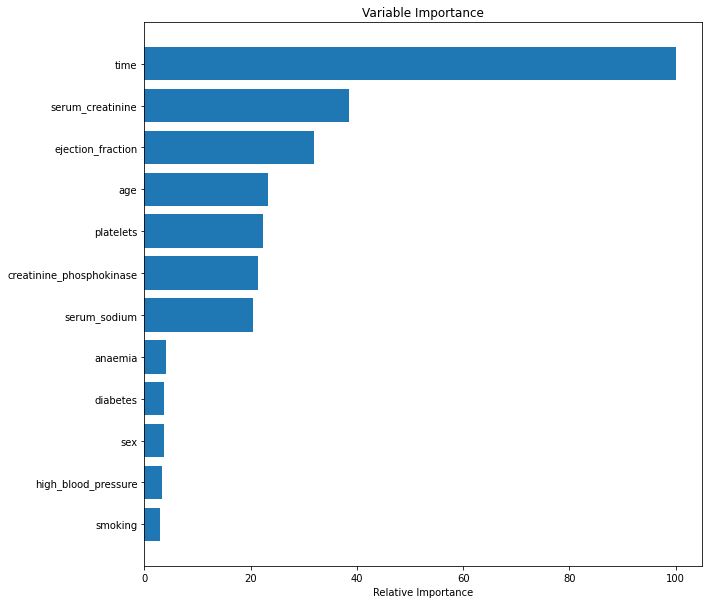

In [58]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier

entr_model = DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X, y)
y_pred = entr_model.predict(X)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [38]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

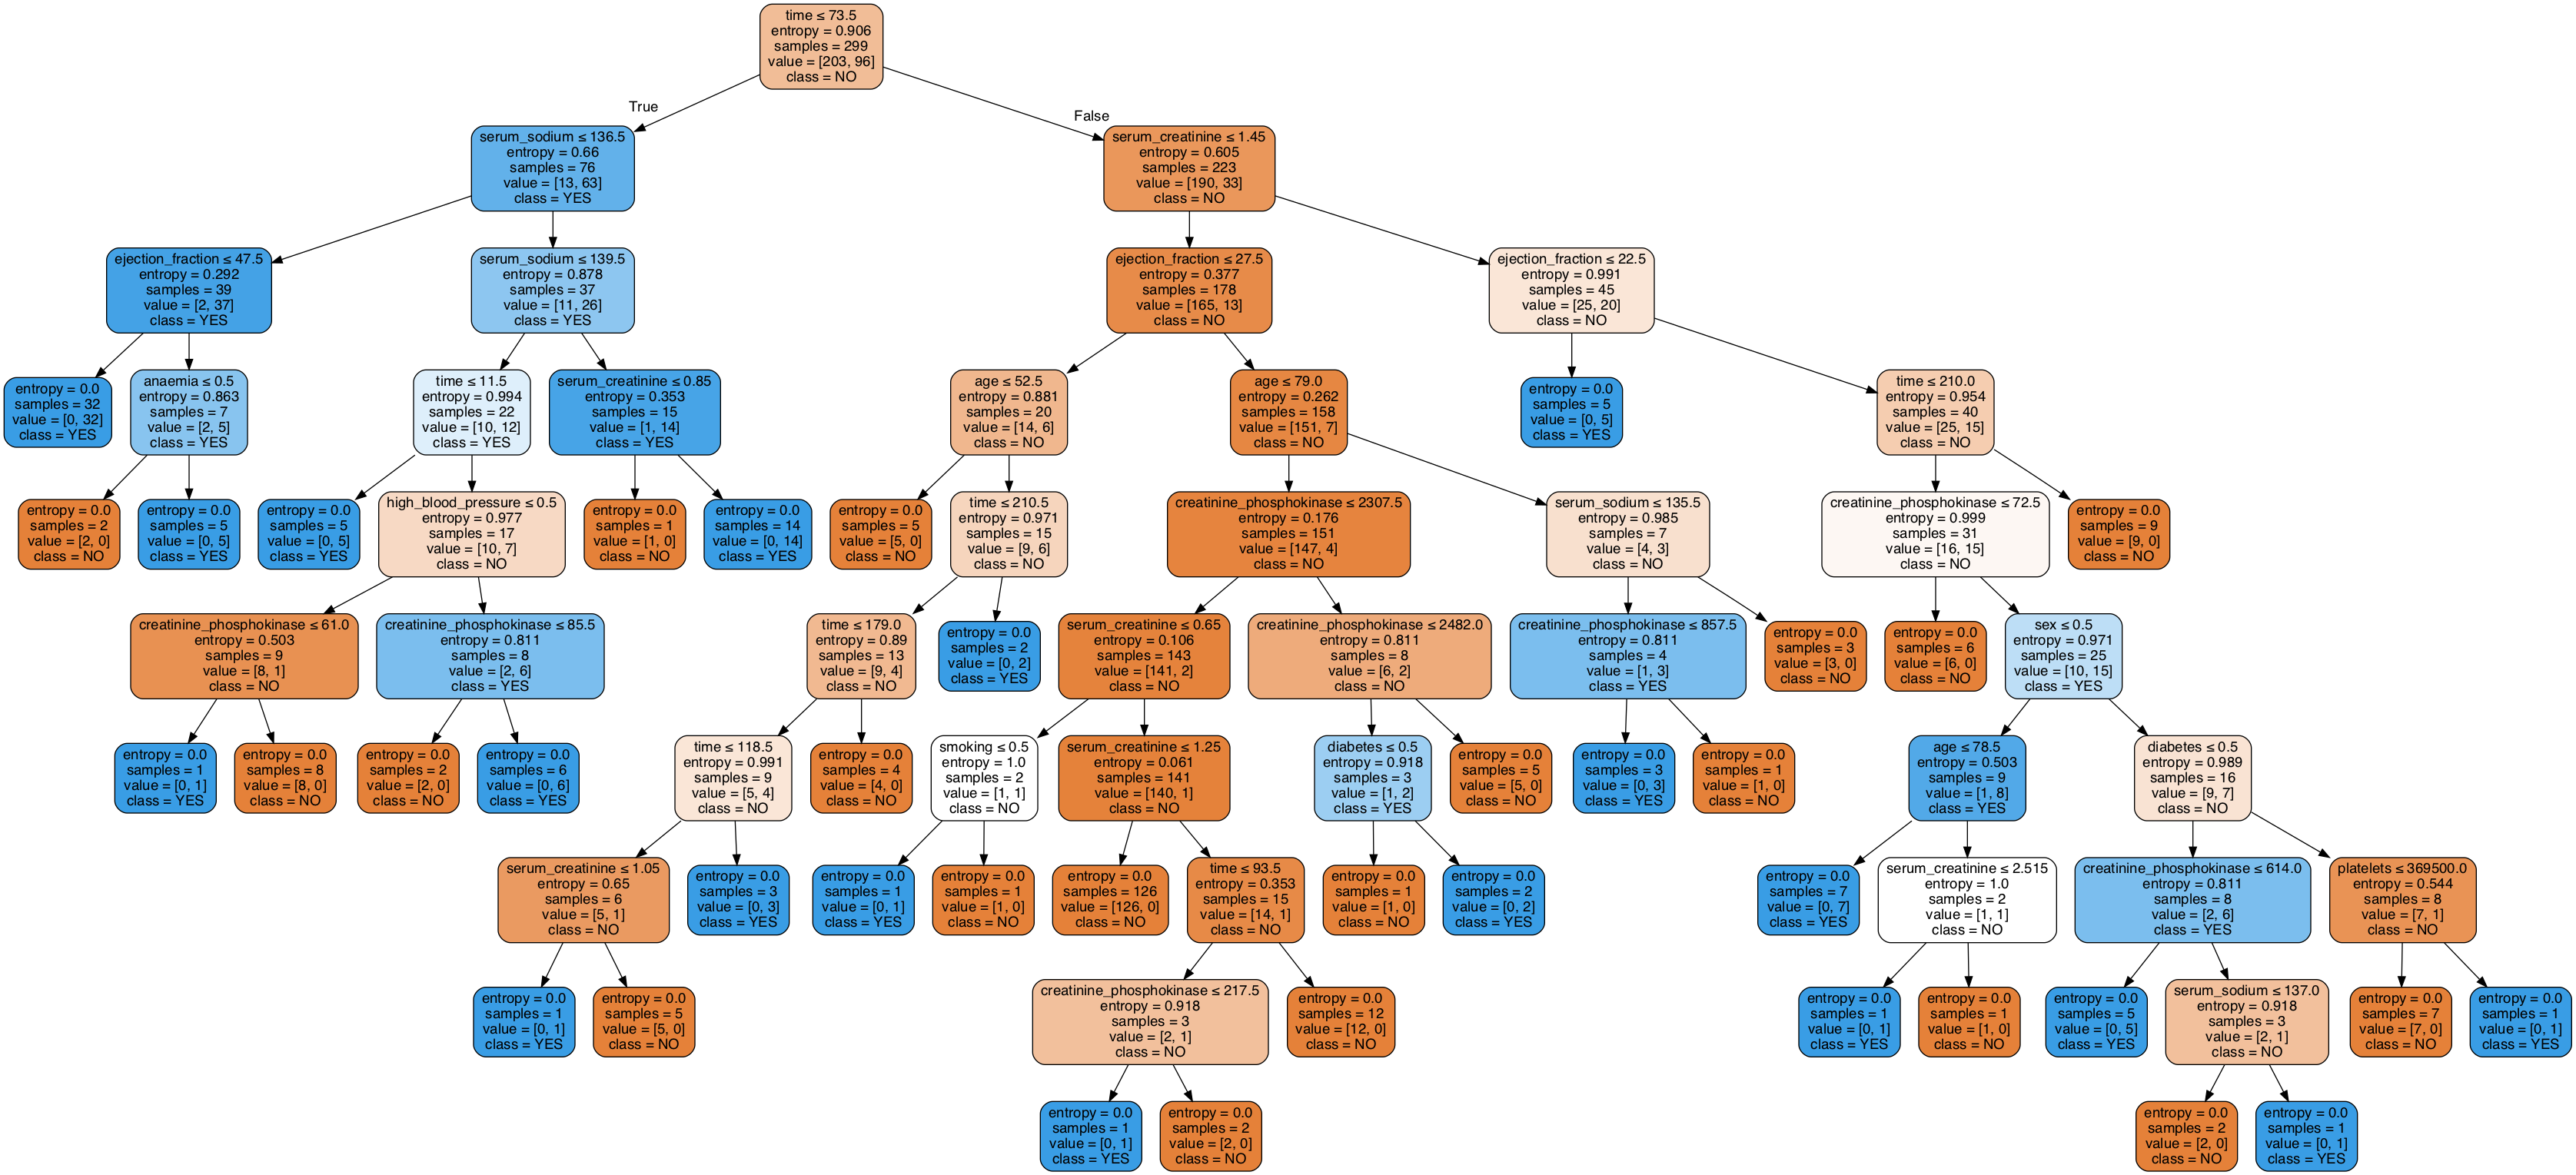

In [39]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [60]:
print(cross_val_score(entr_model, X, y, cv=5))

[0.38333333 0.76666667 0.75       0.61666667 0.71186441]


In [61]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        96

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



The cross validation folds for this model are not as accurate as the random forest model, but once again the model
is overfitting the data and will not be useful when evaluating new data. It may be useful to restrict the depth 
of the tree. 

In [62]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X, y)
y_pred = gini_model.predict(X)
y_pred = pd.Series(y_pred)
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

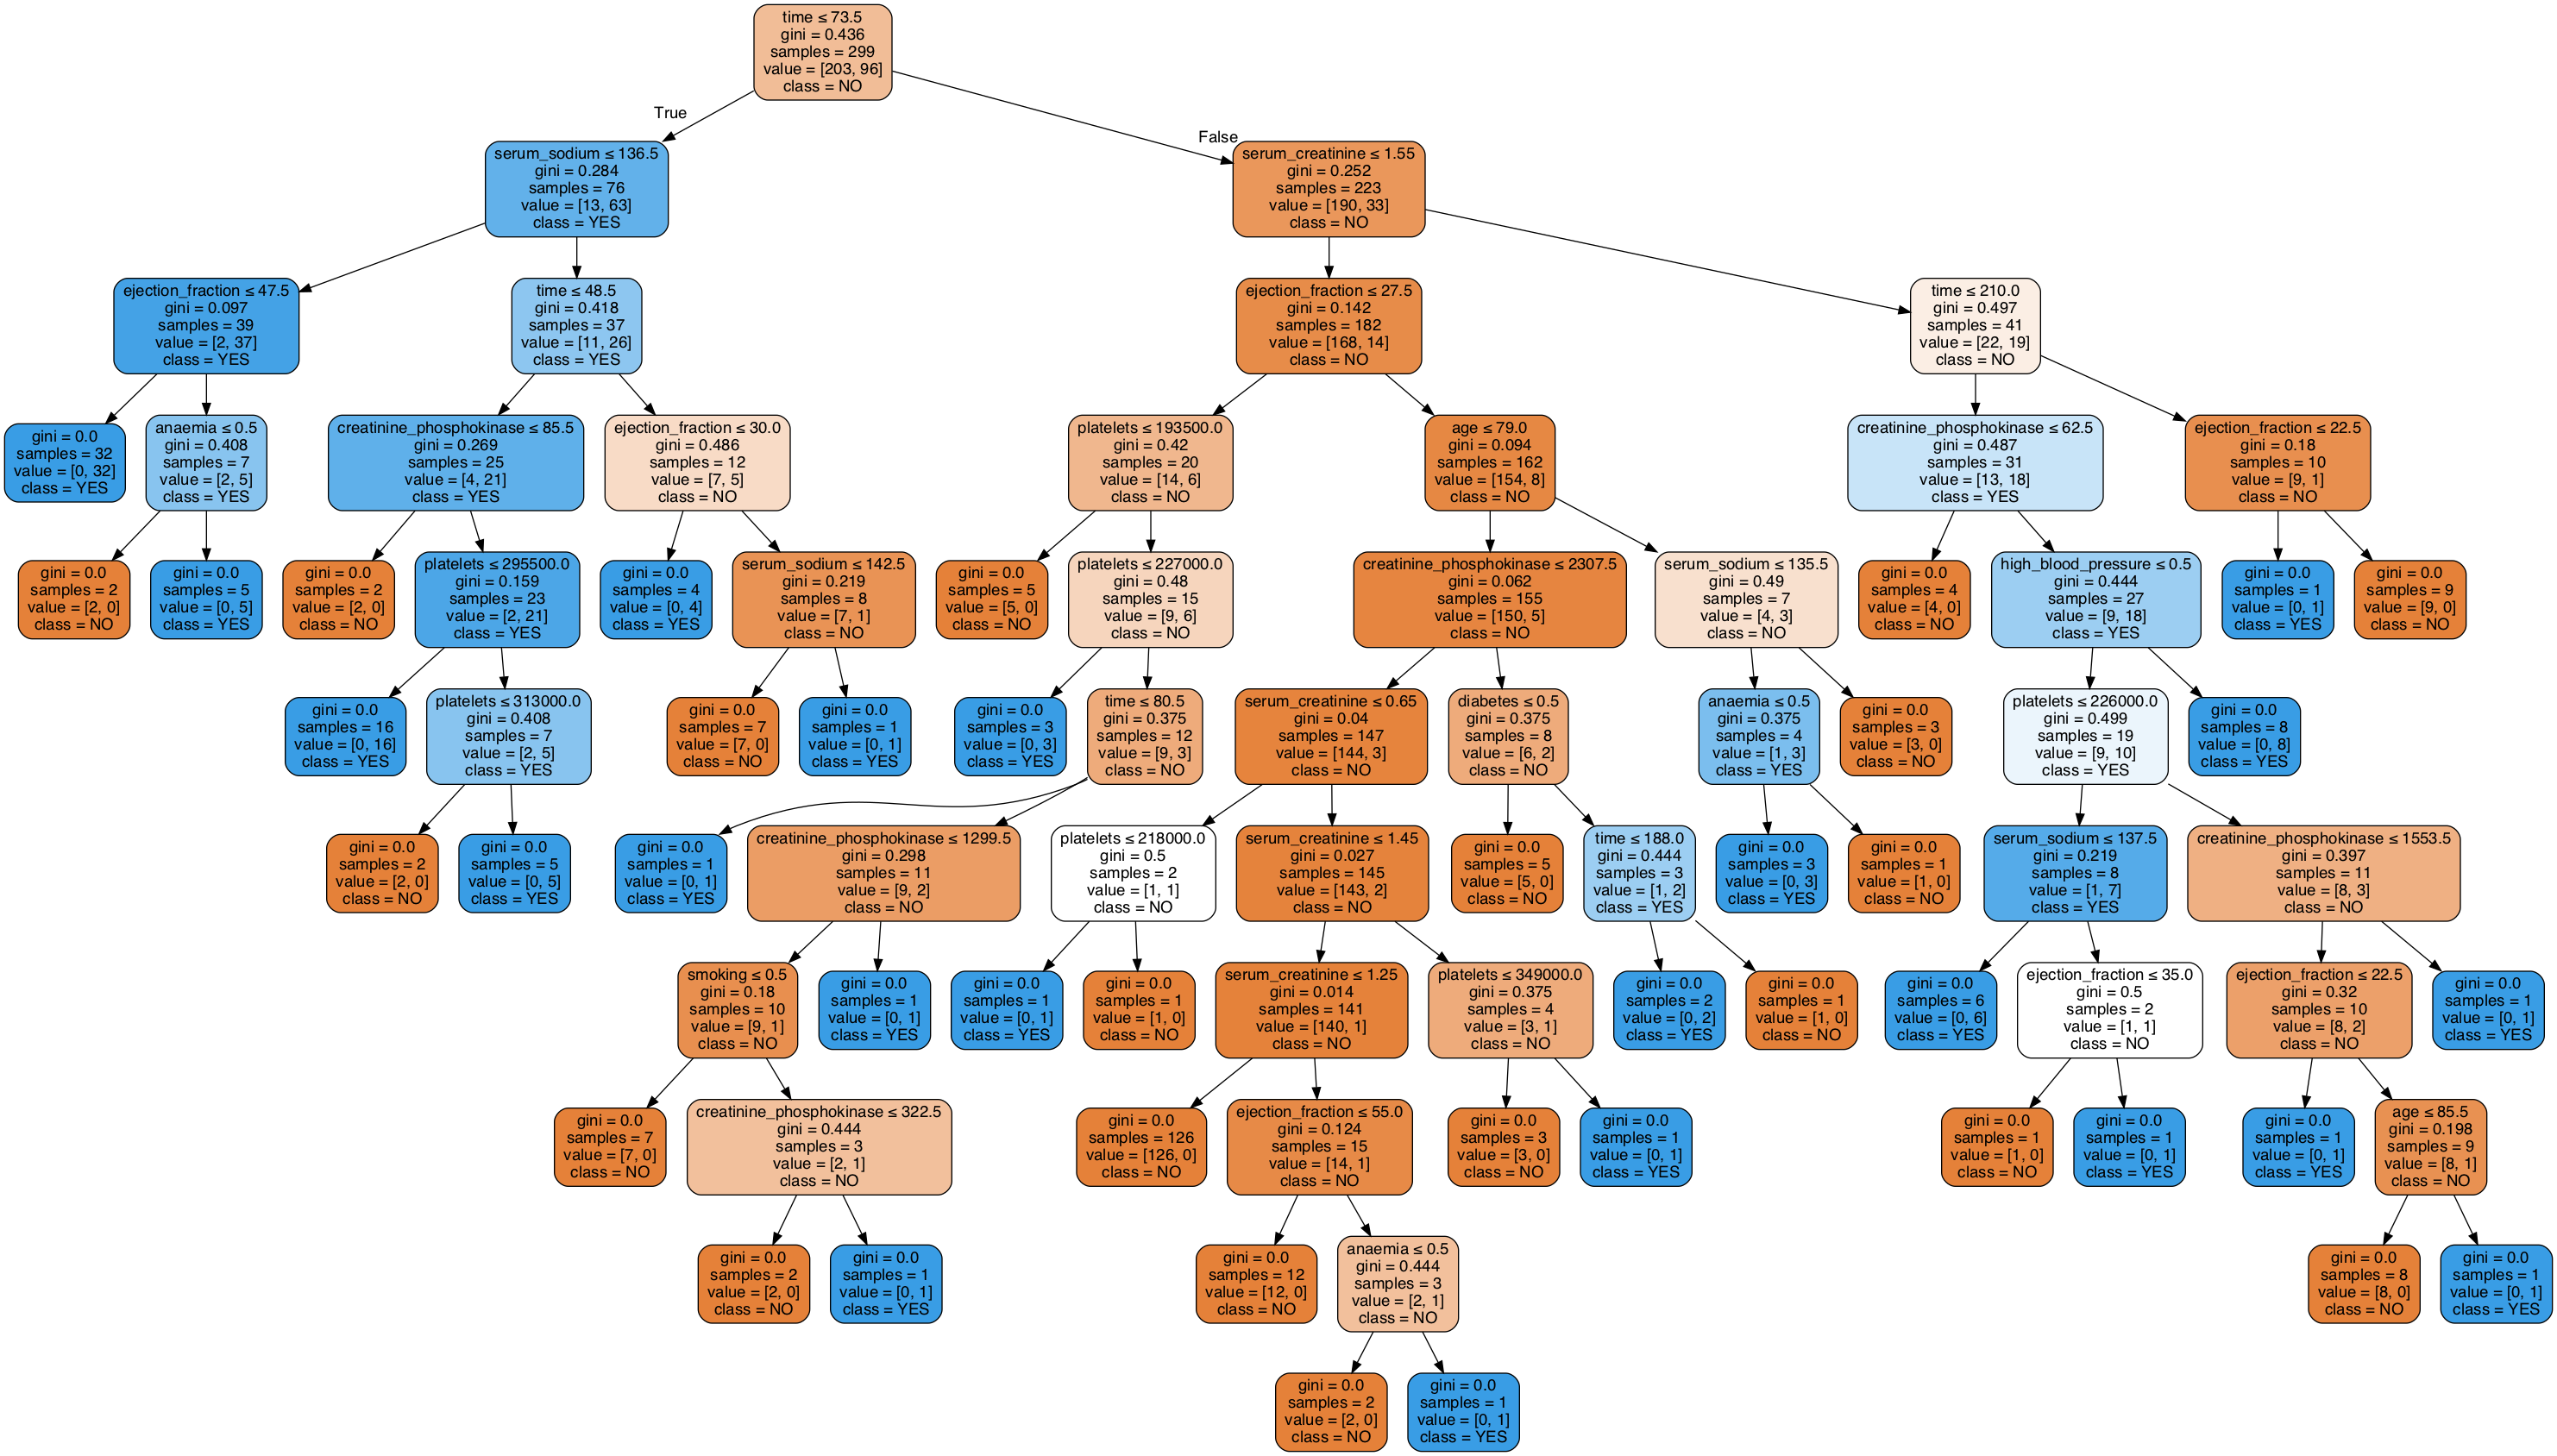

In [43]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
print(cross_val_score(gini_model, X, y, cv=5))

[0.36666667 0.88333333 0.71666667 0.58333333 0.66101695]


In [64]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        96

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



This model shows the same issues as the previous two models and performs about as well as the preceding ones. 

In [65]:
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X, y)
y_pred = entr_model2.predict(X)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

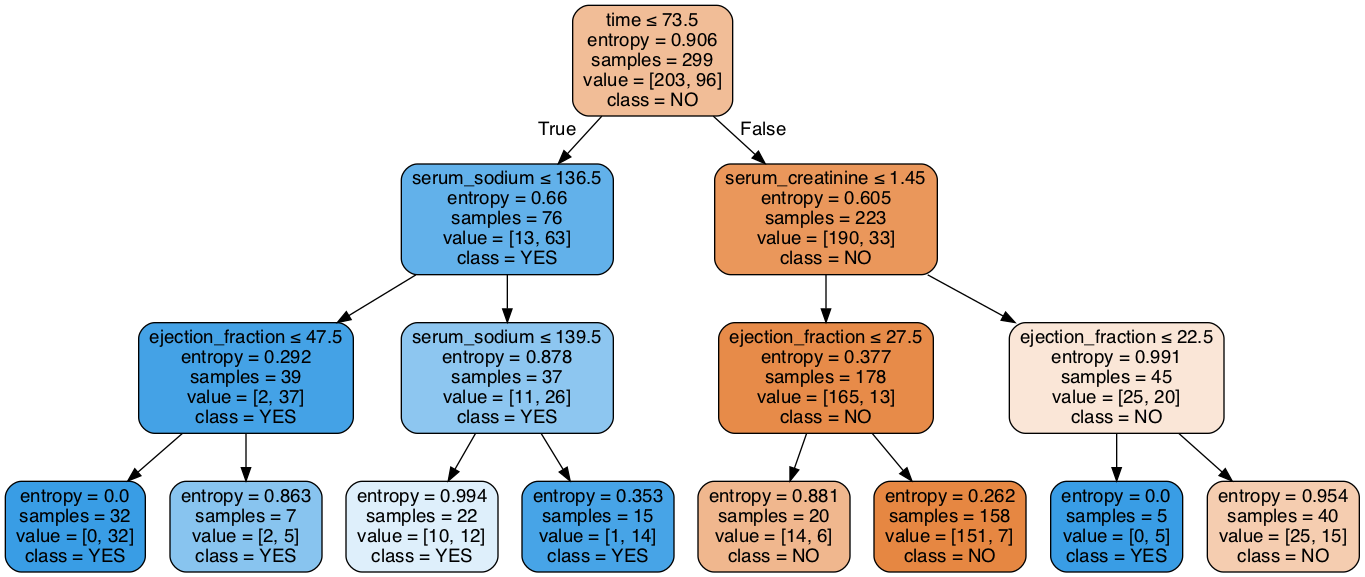

In [46]:
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
print(cross_val_score(entr_model2, X, y, cv=5))

[0.45       0.88333333 0.78333333 0.53333333 0.6779661 ]


In [67]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       203
           1       0.84      0.71      0.77        96

    accuracy                           0.86       299
   macro avg       0.86      0.82      0.84       299
weighted avg       0.86      0.86      0.86       299



This model is much better than the other decision tree models or the random forest model because it has high scores
in all metrics of the classification report but is not overfitting the data to the degree of the other models. 
I would probably choose the logistic regression model since it is the simpler model and is similarly accurate. The
accuracy of the decision tree model is not different enough from the logistic regression model to outweigh
the computational cost of the model. 

For additional data regarding the possibility of death events for future patients, I would use the logistic regression
model to look at the predicted outcomes for those patients. It appears that the most important features when 
analyzing health outcomes for these patients is serum creatinine levels, ejection fraction, age, platelet levels, creatinine phosphokinase levels, and serum sodium levels. 